# Hospital Data Analysis

## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#load in data from csv
health_data = pd.read_csv(r"C:\Users\Sujin Baby\OneDrive\Desktop\Health Dataset Python\Health Dataset Python\Health_dataset.csv")

#Display the first few rows
print(health_data.head())

  Patient ID  Gender       Disease         Treatment               Hospital  \
0  PAT-00001    Male  Tuberculosis          Dialysis  City General Hospital   
1  PAT-00002  Female       Malaria          Dialysis  City General Hospital   
2  PAT-00003  Female       Malaria           Surgery  City General Hospital   
3  PAT-00004    Male        Asthma          Dialysis  City General Hospital   
4  PAT-00005  Female      Diabetes  Physical Therapy  City General Hospital   

  Admission Date Discharge Date Treatment Status Cause of Death Date of Birth  
0     2022-12-19     2023-01-16        Recovered            NaN    1973-06-05  
1     2023-03-29     2023-04-21        Recovered            NaN    1998-11-21  
2     2022-09-16     2022-10-15        Recovered            NaN    1942-02-14  
3     2022-02-07     2022-02-11        Recovered            NaN    1943-01-17  
4     2022-10-25     2022-10-30        Recovered            NaN    1979-07-28  



### 1) What is the total number of patients ?


In [2]:
total_records = health_data.shape[0]
print("Total Patients", total_records)

Total Patients 8000


### 2) How is the patient population distributed by gender ?

In [3]:
gender_count = health_data['Gender'].value_counts()
print("Gender Distribution:")
print(gender_count)

Gender Distribution:
Gender
Male      5206
Female    2794
Name: count, dtype: int64


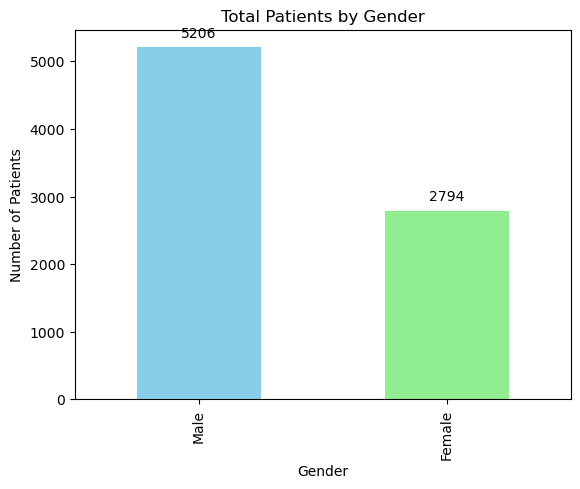

In [4]:
#Gender Visualization

ax = gender_count.plot(kind='bar', color =['skyblue','lightgreen'])

plt.title('Total Patients by Gender')
plt.ylabel("Number of Patients")

#label part:
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
    int(height),
    xy=(bar.get_x() + bar.get_width()/2, height),
    xytext = (0,5),
    textcoords = 'offset points',
    ha = 'center',
    va = 'bottom')

plt.show()

### 3) Patient's Age-group by total visit

Age Group
21-40     1646
41-60     1608
81-100    1603
61-80     1580
0-20      1533
Name: count, dtype: int64


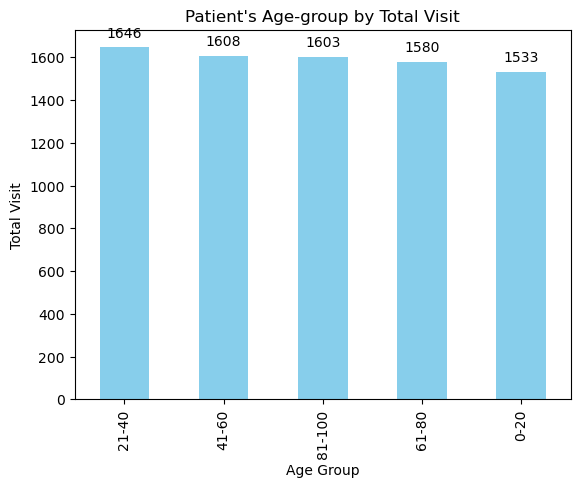

In [5]:
#Convert the Admission date and Date of Birth to proper date format
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Date of Birth'] = pd.to_datetime(health_data['Date of Birth'])

#calculate the patient age as of the time of Admission in year
health_data['Age'] = (health_data['Admission Date'] - health_data['Date of Birth']).dt.days / 365.25
health_data['Age'] = health_data['Age'].astype(int)

#Define age bins
bins = [0,20,40,60,80,100]
labels = ['0-20','21-40','41-60','61-80','81-100']

#create an age group using the bins var defined
health_data['Age Group'] = pd.cut(health_data['Age'],bins=bins,labels=labels,right=False)

#count the number of patients in each age group
age_count = health_data['Age Group'].value_counts()

#visualize the age group
ax = age_count.plot(kind='bar',color='skyblue')

plt.title("Patient's Age-group by Total Visit")
plt.ylabel("Total Visit")

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
    int(height),
    xy=(bar.get_x() + bar.get_width()/2, height),
    xytext = (0,5),
    textcoords = 'offset points',
    ha = 'center',
    va = 'bottom')
print(age_count)

### 4) Which diseases are most commonly diagnosed among the patients?

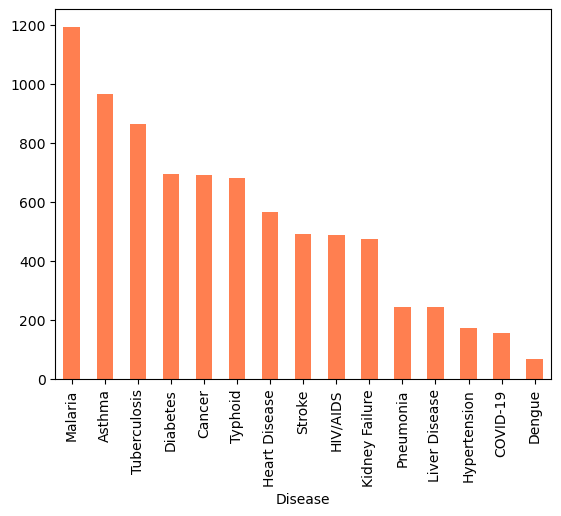

In [6]:
disease_counts = health_data['Disease'].value_counts()
ax = disease_counts.plot(kind='bar',color='coral')

In [7]:
#get the top 3 diseases
disease_count = health_data['Disease'].value_counts().nlargest(3)
print(disease_count)

Disease
Malaria         1193
Asthma           966
Tuberculosis     864
Name: count, dtype: int64


In [8]:
#total count of top n common diseases
dynamictop = 5
disease_count = health_data['Disease'].value_counts().nlargest(dynamictop)
total_top = disease_count.sum()
format_value = "{:,}".format(total_top)
description = f"Total count of the {dynamictop} most common diseases:"
print(description,format_value)

Total count of the 5 most common diseases: 4,408


In [9]:
#calculate the top 3 percentage
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)
total_diseases_count = health_data['Disease'].value_counts().sum()

percentage = (disease_counttop3/total_diseases_count)*100
roundpercentage = percentage.round(0).astype(int)
for disease, pct in roundpercentage.items():
    print(f"{disease}: {pct}%")

Malaria: 15%
Asthma: 12%
Tuberculosis: 11%


In [10]:
#calculate the percentage among top 3
disease_counttop3 = health_data['Disease'].value_counts().nlargest(3)
total_diseasestop3count = disease_counttop3.sum()

pcttop3 = (disease_counttop3/total_diseasestop3count)*100
roundpct = pcttop3.round(0).astype(int)
for disease, pct in roundpct.items():
    print(f"{disease}: {pct}%")

Malaria: 39%
Asthma: 32%
Tuberculosis: 29%


### 5) Are certain diseases more prevalent in one gender compared to the other?

In [11]:
gender_disease = pd.crosstab(health_data['Disease'],health_data['Gender'])
print("Diseases that are common among genders")
print(gender_disease)

Diseases that are common among genders
Gender          Female  Male
Disease                     
Asthma             320   646
COVID-19            53   104
Cancer             239   452
Dengue              27    42
Diabetes           256   438
HIV/AIDS           155   333
Heart Disease      206   361
Hypertension        65   108
Kidney Failure     182   293
Liver Disease       73   171
Malaria            407   786
Pneumonia           93   153
Stroke             177   316
Tuberculosis       302   562
Typhoid            239   441


### 6) Calculate the duration of each patient stay and create a group to show the number of patients in each group

In [12]:
#convert date in proper date data type
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'])
health_data['Discharge Date'] = pd.to_datetime(health_data['Discharge Date'])

health_data['Stay Duration'] = (health_data['Discharge Date'] - health_data['Admission Date']).dt.days
print(health_data[['Admission Date','Discharge Date','Stay Duration']])

     Admission Date Discharge Date  Stay Duration
0        2022-12-19     2023-01-16             28
1        2023-03-29     2023-04-21             23
2        2022-09-16     2022-10-15             29
3        2022-02-07     2022-02-11              4
4        2022-10-25     2022-10-30              5
...             ...            ...            ...
7995     2022-06-28     2022-07-05              7
7996     2022-01-28     2022-02-25             28
7997     2022-09-14     2022-09-22              8
7998     2023-08-04     2023-08-25             21
7999     2023-09-09     2023-10-06             27

[8000 rows x 3 columns]


In [13]:
#Group Stay Duration
bins = [-1,0,3,7,14,float('inf')]
labels = ['Same Day','1-3 Days','4-7 Days','8-14 Days','Above 21 Days']
health_data['Stay Bucket'] = pd.cut(health_data['Stay Duration'],bins=bins,labels=labels,right=True)
print(health_data['Stay Bucket'])

0       Above 21 Days
1       Above 21 Days
2       Above 21 Days
3            4-7 Days
4            4-7 Days
            ...      
7995         4-7 Days
7996    Above 21 Days
7997        8-14 Days
7998    Above 21 Days
7999    Above 21 Days
Name: Stay Bucket, Length: 8000, dtype: category
Categories (5, object): ['Same Day' < '1-3 Days' < '4-7 Days' < '8-14 Days' < 'Above 21 Days']


#### Number of patients on each group

In [14]:
total_group_patient = health_data['Stay Bucket'].value_counts()
print(total_group_patient)

Stay Bucket
Above 21 Days    4269
8-14 Days        1837
4-7 Days         1087
1-3 Days          807
Same Day            0
Name: count, dtype: int64


#### Visualize

Text(0.5, 1.0, 'Total Patients by length of stay')

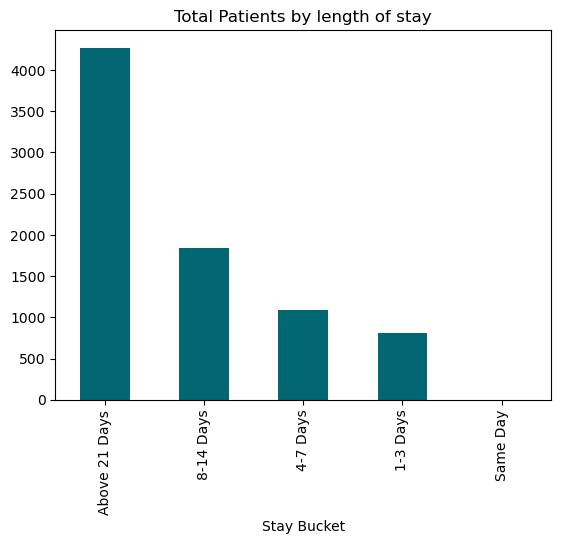

In [15]:
total_group_patient.plot(kind='bar',color=['#026773'])
plt.title("Total Patients by length of stay")

### 7) For any records with a recorded cause of death, analyze pattern to identify risk factor

In [16]:
#filter records where the cause of death is not empty
death_cause = health_data.dropna(subset='Cause of Death')
count_cause = death_cause['Cause of Death'].value_counts()

print('Most common cause of Death')
print(count_cause)

Most common cause of Death
Cause of Death
Multiple Organ Failure    114
Respiratory Failure       109
Cardiac Arrest            102
Septic Shock               94
Name: count, dtype: int64


#### visualize

Text(0.5, 1.0, 'Top Causes of Death')

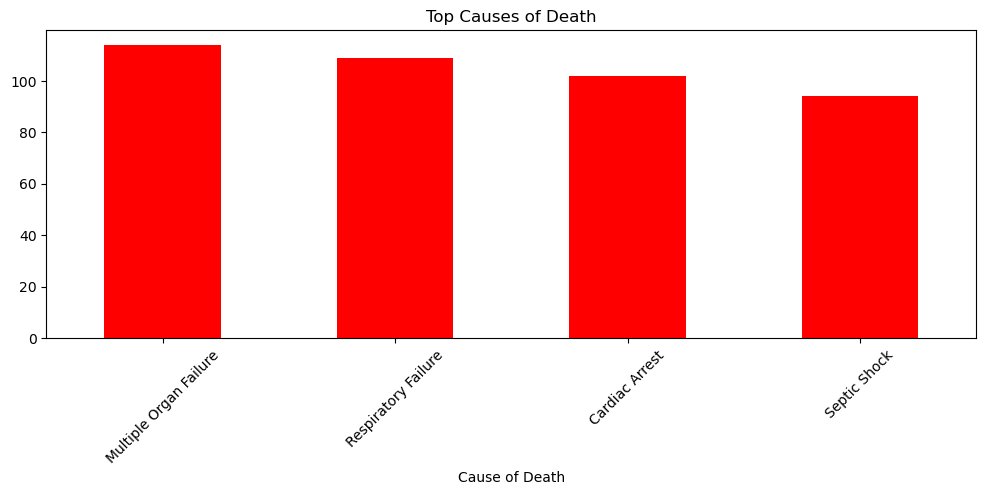

In [17]:
plt.figure(figsize = (12,4))
count_cause.plot(kind='bar',color='red')
plt.xticks(rotation=45)
plt.title('Top Causes of Death')

### 8) What is the percentage of the following patients: Deceased,under-treatment and recovered patients?

In [18]:
#Total patients
total_patients = health_data.shape[0]
total_patients

8000

#### Deceased patients

In [19]:
#Total deceased patients
total_death = (health_data['Treatment Status'].str.lower()=='deceased').sum()

#Percentage of deceased
death_rate = (total_death/total_patients)*100 if total_patients>0 else 0
death_rate

5.2375

#### Recovered patients

In [20]:
#Total recovered patients
total_recovered = (health_data['Treatment Status'].str.lower()=='recovered').sum()

#Percentage of deceased
recovered_rate = (total_recovered/total_patients)*100 if total_patients>0 else 0
recovered_rate

85.2375

#### Under-Treatment patients

In [21]:
#All patients under treatment
under_treatment = 100 - (recovered_rate + death_rate)
under_treatment

9.525000000000006

##### Visualize

In [22]:
print('Total recovery rate:', recovered_rate)
print('Causality rate:', death_rate)
print('Under treatment rate:', under_treatment)

Total recovery rate: 85.2375
Causality rate: 5.2375
Under treatment rate: 9.525000000000006


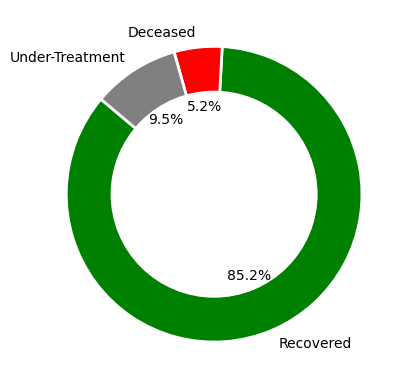

In [23]:
labels=['Recovered','Deceased','Under-Treatment']
sizes=[recovered_rate,death_rate,under_treatment]
colors=['green','red','gray']

plt. Figure(figsize=(12,10))
plt.pie(sizes,labels=labels,autopct='%1.1f%%'
,colors=colors,startangle=140,wedgeprops={'edgecolor':'White','linewidth':2})
plt.gca().add_artist(plt. Circle((0,0),0.70,fc='white'))

plt.show()

### 9) What are the peak days of the week on a monthly basis for admissions and discharges?

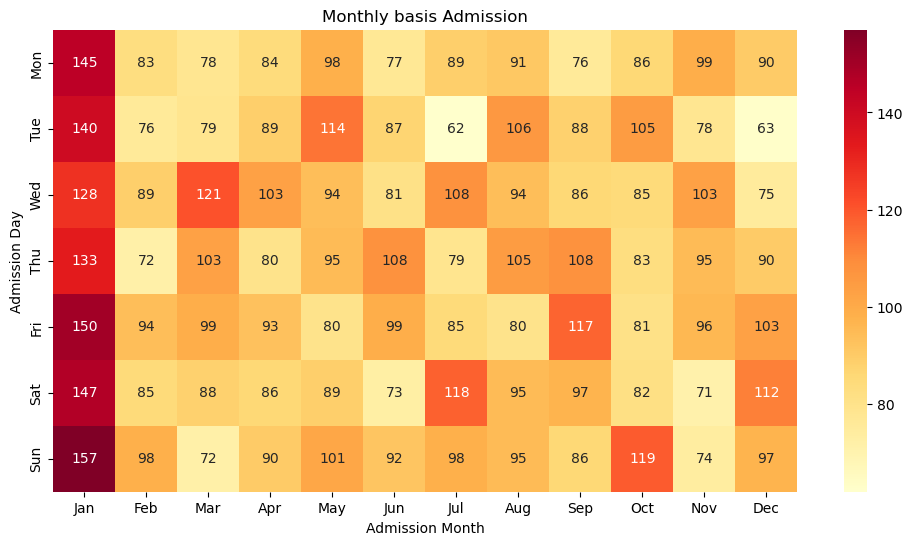

In [24]:
#convert admission date to proper date format
health_data['Admission Date'] = pd.to_datetime(health_data['Admission Date'],errors='coerce')

#extract the short day and month name
health_data['Admission Month'] = health_data['Admission Date'].dt.strftime('%b')
health_data['Admission Day'] = health_data['Admission Date'].dt.strftime('%a')

#Define proper order for month and abbreviated days
month_order = [
    'Jan','Feb','Mar','Apr','May','Jun',
    'Jul','Aug','Sep','Oct','Nov','Dec'
]

day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

#create a Pivot table
admission_heatmap = health_data.pivot_table(
    index = 'Admission Day',
    columns = 'Admission Month',
    aggfunc = 'size',
    fill_value = 0
)
#correct reorder of heatmap data
admission_heatmap_sorted = admission_heatmap.reindex(index = day_order, columns = month_order)

#plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(admission_heatmap_sorted,annot=True,fmt='d',cmap='YlOrRd')
plt.title('Monthly basis Admission')
plt.show()

### 10) What is the total number of patients admitted per week, month and year? Add a filter to filter the month by year

In [31]:
# create a new column
health_data['Admission Day'] = health_data['Admission Date'].dt.strftime('%a')

# Group data by the day name and count admission
admission_by_day = health_data.groupby('Admission Day').size()

# sort the name of day
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
admission_by_day = admission_by_day.reindex(day_order, fill_value =0)
admission_by_day

Admission Day
Mon    1096
Tue    1087
Wed    1167
Thu    1151
Fri    1177
Sat    1143
Sun    1179
dtype: int64

Admission Day
Mon    1096
Tue    1087
Wed    1167
Thu    1151
Fri    1177
Sat    1143
Sun    1179
dtype: int64

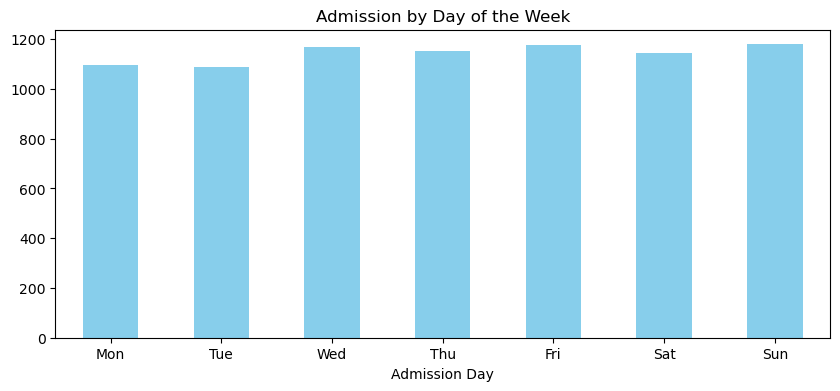

In [34]:
# create a visual
admission_by_day.plot(kind='bar', color='skyblue', figsize=(10,4))
plt.title('Admission by Day of the Week')
plt.xticks(rotation=0)
admission_by_day

In [37]:
# Top 3 days with high admission
top_3_admission_day = health_data['Admission Day'].value_counts().nlargest(3)
top_3_admission_day

Admission Day
Sun    1179
Fri    1177
Wed    1167
Name: count, dtype: int64

In [38]:
# Bottom 3 days with high admission
bottom_3_admission_day = health_data['Admission Day'].value_counts().nsmallest(3)
bottom_3_admission_day

Admission Day
Tue    1087
Mon    1096
Sat    1143
Name: count, dtype: int64

#### Total admission by month filtered by year

In [43]:
# filter using the year of admission
selected_year = 2023
df_year = health_data[health_data['Admission Date'].dt.year == selected_year].copy()

# Adding the month column
df_year['Admission Month'] = df_year['Admission Date'].dt.month

# Month Name
df_year['Month Name'] = df_year['Admission Date'].dt.month_name()

# Total Admission on a monthly basis
monthly_admission = (
    df_year
    .groupby(['Admission Month','Month Name'])
    .size()
    .reset_index(name='Total Patients')
    .sort_values('Admission Month')
)
print(f"Total patients admitted in the year {selected_year}")
monthly_admission

Total patients admitted in the year 2023


,Admission Month,Month Name,Total Patients
0,1,January,318
1,2,February,293
2,3,March,327
3,4,April,298
4,5,May,322
5,6,June,302
6,7,July,312
7,8,August,337
8,9,September,347
9,10,October,330


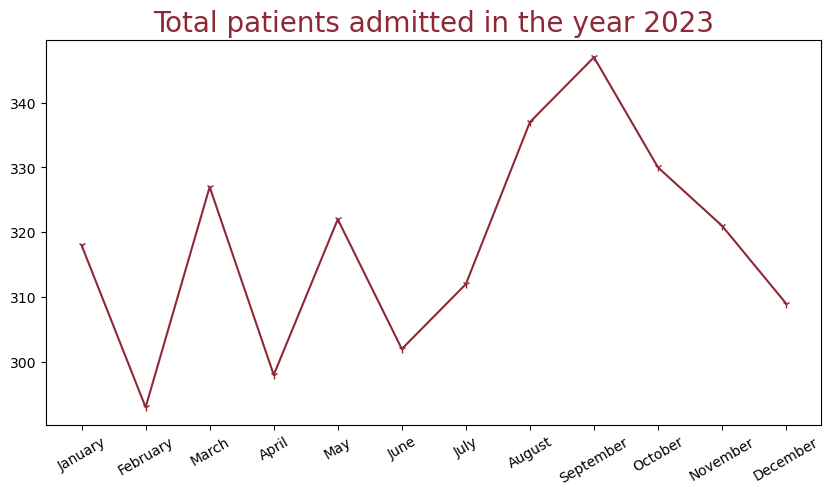

In [52]:
# Create a line chart to visualize

plt.figure(figsize=(10,5))

# Plotting the data
plt.plot(monthly_admission['Month Name'], monthly_admission['Total Patients'],
        marker='1', linestyle = '-', color = '#8D2837'
        )
plt.title(f"Total patients admitted in the year {selected_year}",fontsize=20,color='#8D2837')
plt.xticks(rotation=30)
plt.show()